# CS 237 Spring 2021, HW 10

#### Due date: Thursday April 15th at Midnight (1 minute after 11:59pm on 4/8) via Gradescope (with a 6 hour grace period)

<strong> Late policy:</strong> You may submit the homework up to 24 hours late for a 10% penalty. Hence, the late deadline is Friday 4/16 at Midnight (with a 6 hour grace period). 

#### General Instructions

Please complete this notebook by filling in solutions where indicated. 

For full credit, please take careful note of the following requirements:

- Do NOT use any HTML tags in your notebook, as Gradescope will ignore them;

- Do NOT answer questions by including images, as Gradescope will ignore them; and 

- You MUST  "Restart and Run All" from the Kernel menu before submitting to Gradescope.

**Any assignments which do not follow these requirements will not receive full credit.** 



There are 8 problems on this homework (each worth 7.5 points), 5 analytical and 3 concerning Pandas, a library for managing data files. Pandas is used extensively in data science as part of the "data wrangling" phase of a machine learning project.  

The problems for Lab 10 are problems 1 through 3, and the remaining problems are the analytical problems. 

NOTE (added Sunday am):  I have cancelled problems 8 and 10, mistake in editing, I did not mean to include them.


In [1]:
# Here are some imports which will be used in code that we write for CS 237

import matplotlib.pyplot as plt   # normal plotting
import numpy as np

from math import log, pi, log, floor, ceil, sqrt       # import whatever you want from math
from random import seed, random
from collections import Counter

%matplotlib inline

from scipy.special import comb
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# Here are the basic statistical functions we will use from numpy

from numpy import mean, var, std, median

L = [2,4,3,6,4,5]

# mean value

mean(L)          


# Variance
#  ddof = delta degrees of freedom, default is 0

# population variance
var(L)      

# sample variance
var(L,ddof=1)

# Standard deviation
#  ddof = delta degrees of freedom, default is 0

# population standard deviation
std(L)      

# sample standard deviation
std(L,ddof=1)  

# Median

median(L)  

# Random sampling of `size` elements from list with or without replacement

np.random.choice(L,size=1,replace=True)
       
# Scipy statistical functions

from scipy.stats import norm, binom, expon, geom, poisson, gamma, nbinom, bernoulli                 

# https://docs.scipy.org/doc/scipy/reference/stats.html

#### Normal Distribution    #####

######   Note that in this library loc = mean and scale = standard deviation  #####

# Examples assume random variable X (e.g., housing prices) normally distributed with  mu = 60, sigma = 10

# Probability Density Function    (really only useful for drawing the curve)
#  f(x) = P(X == x)

norm.pdf(x=50,loc=60, scale= 10)     

# Cumulative Density Function
#  F(x) = P(X < x)

# Example:  Percentage of houses less than 50K. 
norm.cdf(x=50,loc=60,scale=10) 

# Example:  Find P(60<X<80)
norm.cdf(x=80,loc=60,scale=40) - norm.cdf(x=60,loc=60,scale=40)

# Survival Function: Simply 1 - CDF, i.e., P(X > x)

# Example:  Percentage of houses more than 50K.
norm.sf(x=50,loc=60,scale=10) 

# Percentage Point Function: Inverse of the CDF:
# For what is the largest value of k for which P( X < k ) = q  ?

# Example: What is the maximum cost of the 5% cheapest houses, 
# i.e., the x such that P(X < x) = 0.05?

norm.ppf(q=0.05,loc=60,scale=40)

# Inverse Survival Function: Inverse (1 - CDF):
# For what is the smallest value of k for which P( X > k ) = q  ?

# Example: What is the minimum cost of the 5% most expensive houses, 
# i.e., the x such that P(X > x) = 0.05?

norm.isf(q=0.05,loc=60,scale=40)

#   Give the endpoints of the interval (centered on the mean)
#   which contain alpha/100 percent of the population (alpha is a probability)

# Ex. Give the interval for the middle 75% of the houses

norm.interval(alpha=0.75, loc=60, scale=40)

# generate a random variate
norm.rvs(loc=60, scale=40)

# generate random variates, returns list of length = size
norm.rvs(loc=60, scale=40, size=10)




##### Bernoulli Distribution  X ~ Bernoulli(p)  ####

#  p = probability of success for Bernoulli trial

# Generate a random variate
bernoulli.rvs(p=0.5)

# Generate a list of random variates
bernoulli.rvs(p=0.5,size=100)

##### Binomial Distribution  X ~ B(n,p)  ####

#  n = number of independent Bernoulli trials
#  p = probability of success for Bernoulli trial
#  k = outcome in range [0 .. n]

# Generate a random variate
binom.rvs(n=10, p=0.5)

# Generate a list of random variates
binom.rvs(n=10, p=0.5,size=100)

# Probability mass function.
binom.pmf(k=4, n=10, p=0.5)

# Cumulative distribution function
binom.cdf(k=4, n=10, p=0.5)

print()

# Pandas Data Management and Analysis Library

In this lab, we will  learn about the Pandas library for data analysis. Pandas is part of the Anaconda distribution, and there are decent tutorials on most aspects of Pandas; I would recommend the following:

Pandas Tutorial: http://pandas.pydata.org/pandas-docs/stable/tutorials.html

Basic functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html

Indexing and selecting data: http://pandas.pydata.org/pandas-docs/stable/indexing.html

There are three problems, the first an extended tutorial, and the last two actual problems. You should read through problem 1 carefully and try all the examples. Problems 2 and 3 are more realistic activities based on the material in problem 1.


## Problem One: Basic Pandas data manipulation

We will first learn how to read data sets from a text or CSV ("Comma Separated Values") file, understand the DataFrame data structure, and learn how to extract data from a dataframe; then we will understand how to select rows and columns from a table, and to apply various functions to tables; finally, we will learn how to display histograms of the data. There is a LOT of complexity in all these various aspects of Pandas, but we will learn a "novice subset" of the most important features.

Note: There is a lot of reading and thinking to do in this first problem; when we want you to do something on your own computer, we will indicate it with a **TODO**. All you really have to do for this problem is to try various things
in Pandas.  Do not skip ahead, however, you need to practice these before going on!

### Data as Tables

The basic form of the data sets manipulated in Pandas (and indeed in all modern database systems) is a 2D table of data with rows and columns; for example, here is a data set we will use as an example:

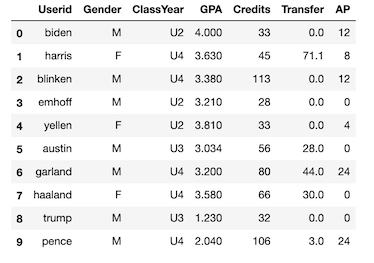

This is a hypothetical list of 10 students at BU; each row is an individual student, and each column gives a specific piece of information about that student. Note that each column contains the same kind of data (i.e., the first three columns have strings, and the remaining are floats--we will assume that all numberic data is represented as floating-point), and each column has a header giving a description of the information in that column. Column headers are not absolutely necessary, but we will make this assumption for now.

**Note on terminology**: In Pandas, a table is called a **dataframe**; in databases we often call the rows in a table records, the columns are called fields, and the headers are then called field names. This terminology is sometimes used in data analysis.

### Comma Separated Value (CSV) Files

A common file format for data stored as text is a CSV file, in which each row is stored on a separate line, with commas between all the fields. The table above would look like this if I opened it with Emacs on my Mac (there would be a newline \n at the end of each line; on a Windows machine there would be \r\n):

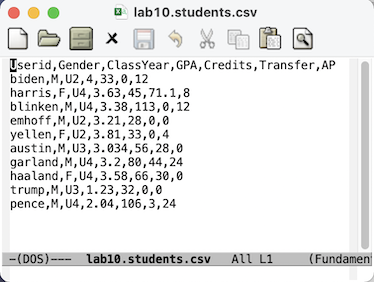

This is a file format supported by Excel as well, and you can import it into an Excel spreadsheet or save a spreadsheet as a CSV file:

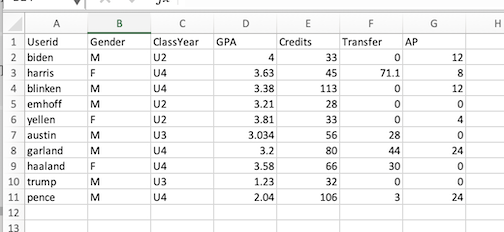

If you want to create such a file, the easiest way is probably to start with an Excel spreadsheet and simply save it in .csv format!

### Reading and Writing CSV Files in Pandas

To manipulate such data tables in Python, the best library is Pandas, which you should import as follows:

In [2]:
import pandas as pd     # this is already done in the first cell at the top of this notebook

Here is an example of reading the csv file `lab10.students.csv` from the 237 data repository using a URL
and storing the data (called a "data frame") in a variable `students`. 

You can also read a file from your current local directory (which we demonstrate a few cells below). 

In [3]:
students = pd.read_csv("https://cs-web.bu.edu/fac/snyder/cs237/Data/lab10.students.csv")
students

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
0,biden,M,U2,4.000,33,0.0,12
1,harris,F,U4,3.630,45,71.1,8
2,blinken,M,U4,3.380,113,0.0,12
3,emhoff,M,U2,3.210,28,0.0,0
4,yellen,F,U2,3.810,33,0.0,4
5,austin,M,U3,3.034,56,28.0,0
6,garland,M,U4,3.200,80,44.0,24
7,haaland,F,U4,3.580,66,30.0,0
8,trump,M,U3,1.230,32,0.0,0
9,pence,M,U4,2.040,106,3.0,24


If you ask for the value of the dataframe to be printed out, it will print it out in ASCII:

In [4]:
print(students)

    Userid Gender ClassYear    GPA  Credits  Transfer  AP
0    biden      M        U2  4.000       33       0.0  12
1   harris      F        U4  3.630       45      71.1   8
2  blinken      M        U4  3.380      113       0.0  12
3   emhoff      M        U2  3.210       28       0.0   0
4   yellen      F        U2  3.810       33       0.0   4
5   austin      M        U3  3.034       56      28.0   0
6  garland      M        U4  3.200       80      44.0  24
7  haaland      F        U4  3.580       66      30.0   0
8    trump      M        U3  1.230       32       0.0   0
9    pence      M        U4  2.040      106       3.0  24


Although we won't need to do this right now, for reference, you can also write out a dataframe to a csv file; the default is to write out the index numbers on each row--in general you want to avoid this. The following command will create an identical file to the one read in, without the pesky index numbers:

In [5]:
students.to_csv('temp.csv', encoding='utf-8', index=False)

Reading in a local file is the same as reading in a file from a URL:

In [6]:
pd.read_csv('temp.csv')

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
0,biden,M,U2,4.000,33,0.0,12
1,harris,F,U4,3.630,45,71.1,8
2,blinken,M,U4,3.380,113,0.0,12
3,emhoff,M,U2,3.210,28,0.0,0
4,yellen,F,U2,3.810,33,0.0,4
5,austin,M,U3,3.034,56,28.0,0
6,garland,M,U4,3.200,80,44.0,24
7,haaland,F,U4,3.580,66,30.0,0
8,trump,M,U3,1.230,32,0.0,0
9,pence,M,U4,2.040,106,3.0,24


### Selecting Rows and Columns from the Dataframe using Slices

Pandas gives you a truly bewildering variety of ways to manipulate dataframes, but first we will only need to think about the basics: selecting rows and columns from the table. This amounts to either selecting rows from the table, or selecting columns from the table (or both).

The basic ideas here is that the dataframe is a two-dimensional matrix, where the rows are indexed by numbers and the columns are indexed by column headers, so that

> rows are selecting by using normal Python array slices, e.g., `[0:3]`

and

> columns are selecting by using a list of column headers, e.g., `[['Userid','GPA']]`

The double brackets are not a typo! The outer brackets enclose the parameter, which is a list of header names. If there is only a single header name, then you can use a single set of brackets, e.g., `['Userid']`.

### TODO

For the following, first try to predict what will happen, and then try it to confirm your understanding:

- students[0:3]
- students[5:]
- students[-3:]
- students[:]
- students[1:7:2]
- students[::-1]

In [7]:
students[0:3]

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
0,biden,M,U2,4.00,33,0.0,12
1,harris,F,U4,3.63,45,71.1,8
2,blinken,M,U4,3.38,113,0.0,12


In [8]:
students[5:]

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
5,austin,M,U3,3.034,56,28.0,0
6,garland,M,U4,3.200,80,44.0,24
7,haaland,F,U4,3.580,66,30.0,0
8,trump,M,U3,1.230,32,0.0,0
9,pence,M,U4,2.040,106,3.0,24


In [9]:
students[-3:]

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
7,haaland,F,U4,3.58,66,30.0,0
8,trump,M,U3,1.23,32,0.0,0
9,pence,M,U4,2.04,106,3.0,24


In [10]:
students[:]

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
0,biden,M,U2,4.000,33,0.0,12
1,harris,F,U4,3.630,45,71.1,8
2,blinken,M,U4,3.380,113,0.0,12
3,emhoff,M,U2,3.210,28,0.0,0
4,yellen,F,U2,3.810,33,0.0,4
5,austin,M,U3,3.034,56,28.0,0
6,garland,M,U4,3.200,80,44.0,24
7,haaland,F,U4,3.580,66,30.0,0
8,trump,M,U3,1.230,32,0.0,0
9,pence,M,U4,2.040,106,3.0,24


In [11]:
students[1:7:2]

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
1,harris,F,U4,3.630,45,71.1,8
3,emhoff,M,U2,3.210,28,0.0,0
5,austin,M,U3,3.034,56,28.0,0


In [12]:
students[::-1]

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
9,pence,M,U4,2.040,106,3.0,24
8,trump,M,U3,1.230,32,0.0,0
7,haaland,F,U4,3.580,66,30.0,0
6,garland,M,U4,3.200,80,44.0,24
5,austin,M,U3,3.034,56,28.0,0
4,yellen,F,U2,3.810,33,0.0,4
3,emhoff,M,U2,3.210,28,0.0,0
2,blinken,M,U4,3.380,113,0.0,12
1,harris,F,U4,3.630,45,71.1,8
0,biden,M,U2,4.000,33,0.0,12


So the point here is that selecting rows is really the same as slicing a list.

As explained above, you select columns by giving a list of the column headers in a list (with double square brackets). 

### TODO

For the following, first try to predict what will happen, and then try it to confirm your understanding:
- students[ ['Userid', 'GPA'] ]
- students[ ['GPA', 'Gender'] ]
- students[ ['Credits'] ]
- students['Credits']
- students[ ['GPA', 'Userid', 'GPA'] ]

In [8]:
students[['GPA','Userid']]

,GPA,Userid
0,4.000,biden
1,3.630,harris
2,3.380,blinken
3,3.210,emhoff
4,3.810,yellen
5,3.034,austin
6,3.200,garland
7,3.580,haaland
8,1.230,trump
9,2.040,pence


In [13]:
students[ ['GPA', 'Gender'] ]

,GPA,Gender
0,4.000,M
1,3.630,F
2,3.380,M
3,3.210,M
4,3.810,F
5,3.034,M
6,3.200,M
7,3.580,F
8,1.230,M
9,2.040,M


In [14]:
students[ ['Credits'] ]

,Credits
0,33
1,45
2,113
3,28
4,33
5,56
6,80
7,66
8,32
9,106


In [15]:
students['Credits']

0     33
1     45
2    113
3     28
4     33
5     56
6     80
7     66
8     32
9    106
Name: Credits, dtype: int64

In [16]:
students[ ['GPA', 'Userid', 'GPA'] ]

,GPA,Userid,GPA
0,4.000,biden,4.000
1,3.630,harris,3.630
2,3.380,blinken,3.380
3,3.210,emhoff,3.210
4,3.810,yellen,3.810
5,3.034,austin,3.034
6,3.200,garland,3.200
7,3.580,haaland,3.580
8,1.230,trump,1.230
9,2.040,pence,2.040



You can also combine these two, to get a slice of rows and a selection of columns.

### TODO

For the following, first try to predict what will happen, and then try it to confirm your understanding:
- students[0:3][['GPA','Userid']]
- students[::-1][['AP','Gender','Credits']]
- students['GPA'][2:7]
- students[2:7][['GPA']]


In [9]:
students[0:3][['GPA','Userid']]

,GPA,Userid
0,4.00,biden
1,3.63,harris
2,3.38,blinken


In [17]:
students[::-1][['AP','Gender','Credits']]

,AP,Gender,Credits
9,24,M,106
8,0,M,32
7,0,F,66
6,24,M,80
5,0,M,56
4,4,F,33
3,0,M,28
2,12,M,113
1,8,F,45
0,12,M,33


In [18]:
students['GPA'][2:7]

2    3.380
3    3.210
4    3.810
5    3.034
6    3.200
Name: GPA, dtype: float64

In [19]:
students[2:7][['GPA']]

,GPA
2,3.380
3,3.210
4,3.810
5,3.034
6,3.200


Note carefully the last two examples: it does not matter what order you put the selectors in.

Finally, you would expect that you could do a slice on column names, like this:

          students[ ['GPA' : 'AP'] ]         # error!

Nope! In order to do this, you need to use the `loc` function, and give it two slices separated by a comma.


### TODO

For the following, first try to predict what will happen, and then try it to confirm your understanding:

- students.loc[ 0:3 , 'GPA':'AP' ]
- students.loc[:, 'Userid':'GPA']
- students.loc[:5, 'ClassYear': ]
- students.loc[2:7, 'Userid':'Transfer':2]
- students.loc[::-1, ::-1]


In [10]:
a = students.loc[ 0:3 , 'GPA':'AP' ]

In [11]:
a

,GPA,Credits,Transfer,AP
0,4.00,33,0.0,12
1,3.63,45,71.1,8
2,3.38,113,0.0,12
3,3.21,28,0.0,0


In [12]:
students.loc[::-1, ::-1]

,AP,Transfer,Credits,GPA,ClassYear,Gender,Userid
9,24,3.0,106,2.040,U4,M,pence
8,0,0.0,32,1.230,U3,M,trump
7,0,30.0,66,3.580,U4,F,haaland
6,24,44.0,80,3.200,U4,M,garland
5,0,28.0,56,3.034,U3,M,austin
4,4,0.0,33,3.810,U2,F,yellen
3,0,0.0,28,3.210,U2,M,emhoff
2,12,0.0,113,3.380,U4,M,blinken
1,8,71.1,45,3.630,U4,F,harris
0,12,0.0,33,4.000,U2,M,biden


In [20]:
students.loc[:, 'Userid':'GPA']

,Userid,Gender,ClassYear,GPA
0,biden,M,U2,4.000
1,harris,F,U4,3.630
2,blinken,M,U4,3.380
3,emhoff,M,U2,3.210
4,yellen,F,U2,3.810
5,austin,M,U3,3.034
6,garland,M,U4,3.200
7,haaland,F,U4,3.580
8,trump,M,U3,1.230
9,pence,M,U4,2.040


In [21]:
students.loc[:5, 'ClassYear': ]

,ClassYear,GPA,Credits,Transfer,AP
0,U2,4.000,33,0.0,12
1,U4,3.630,45,71.1,8
2,U4,3.380,113,0.0,12
3,U2,3.210,28,0.0,0
4,U2,3.810,33,0.0,4
5,U3,3.034,56,28.0,0


In [22]:
students.loc[2:7, 'Userid':'Transfer':2]

,Userid,ClassYear,Credits
2,blinken,U4,113
3,emhoff,U2,28
4,yellen,U2,33
5,austin,U3,56
6,garland,U4,80
7,haaland,U4,66


### Selecting Rows and Columns from the Dataframe using Boolean Expressions

Pandas gives you lots of ways of selecting data, and a particularly useful way of selecting rows is to specify a boolean expression that the row values must satisfy. For example, to select only those rows representing men, we could do this:

In [13]:
men = students[ students['Gender'] == 'M' ]
men

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
0,biden,M,U2,4.000,33,0.0,12
2,blinken,M,U4,3.380,113,0.0,12
3,emhoff,M,U2,3.210,28,0.0,0
5,austin,M,U3,3.034,56,28.0,0
6,garland,M,U4,3.200,80,44.0,24
8,trump,M,U3,1.230,32,0.0,0
9,pence,M,U4,2.040,106,3.0,24


and here we select the rows where the Credits are less than the Transfer:

In [14]:
lessCredits = students[students['Credits'] < students['Transfer']]
lessCredits

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
1,harris,F,U4,3.63,45,71.1,8


### TODO

For the following, first try to predict what will happen, and then try it to confirm your understanding:
- students[ students['Userid'] >= 'haaland' ]
- students[ students['AP'] == 0 ]
- students[ students['GPA'] < 3.5 ]

In [15]:
students[ students['Userid'] >= 'haaland' ]

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
1,harris,F,U4,3.63,45,71.1,8
4,yellen,F,U2,3.81,33,0.0,4
7,haaland,F,U4,3.58,66,30.0,0
8,trump,M,U3,1.23,32,0.0,0
9,pence,M,U4,2.04,106,3.0,24


In [23]:
students[ students['AP'] == 0 ]

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
3,emhoff,M,U2,3.210,28,0.0,0
5,austin,M,U3,3.034,56,28.0,0
7,haaland,F,U4,3.580,66,30.0,0
8,trump,M,U3,1.230,32,0.0,0


In [24]:
students[ students['GPA'] < 3.5 ]

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
2,blinken,M,U4,3.380,113,0.0,12
3,emhoff,M,U2,3.210,28,0.0,0
5,austin,M,U3,3.034,56,28.0,0
6,garland,M,U4,3.200,80,44.0,24
8,trump,M,U3,1.230,32,0.0,0
9,pence,M,U4,2.040,106,3.0,24


To do compound boolean expressions when selecting rows, you have to enclose the expressions in parentheses and use the "bitwise" boolean operations `~`, `&`, `|` (instead of the normal Python `not`, `and`, `or`); here is an example:

In [16]:
menGPA = students[(students['Gender'] == 'M') & (students['GPA'] < 3.5 )]
menGPA

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
2,blinken,M,U4,3.380,113,0.0,12
3,emhoff,M,U2,3.210,28,0.0,0
5,austin,M,U3,3.034,56,28.0,0
6,garland,M,U4,3.200,80,44.0,24
8,trump,M,U3,1.230,32,0.0,0
9,pence,M,U4,2.040,106,3.0,24


### Turning a column into a list

Sometimes you simply want to grab one particular column (say the GPA) into a list, so that you
can manipulate it in Python. This is easy, as you just have to convert a single-column frame into a list:

In [17]:
G = list(students['GPA'])
G

[4.0, 3.63, 3.38, 3.21, 3.81, 3.034, 3.2, 3.58, 1.23, 2.04]

### Converting a whole data frame into a list of lists

You can convert the entire data set into Python lists as follows. 

In [18]:
students.values.tolist()

[['biden', 'M', 'U2', 4.0, 33, 0.0, 12],
 ['harris', 'F', 'U4', 3.63, 45, 71.1, 8],
 ['blinken', 'M', 'U4', 3.38, 113, 0.0, 12],
 ['emhoff', 'M', 'U2', 3.21, 28, 0.0, 0],
 ['yellen', 'F', 'U2', 3.81, 33, 0.0, 4],
 ['austin', 'M', 'U3', 3.034, 56, 28.0, 0],
 ['garland', 'M', 'U4', 3.2, 80, 44.0, 24],
 ['haaland', 'F', 'U4', 3.58, 66, 30.0, 0],
 ['trump', 'M', 'U3', 1.23, 32, 0.0, 0],
 ['pence', 'M', 'U4', 2.04, 106, 3.0, 24]]

You can slice this to get only particular rows, or a single row:

In [19]:
(students[1:2].values.tolist())[0]

['harris', 'F', 'U4', 3.63, 45, 71.1, 8]

### Saving your work to a file

Note that each of these expressions we have explored returns a new dataframe, so that if you wanted to create a new data set derived from an existing set, you could assign an expression to a variable and write it out, e.g.,

In [20]:
studrev = students.loc[::-1, ::-1]
studrev.to_csv("studentrev.csv", index=False)

or just combine without bothering with the variable:

In [21]:
students.loc[::-1, ::-1].to_csv("studentrev.csv", index=False)

Both of these would put the file studentrev.csv into my work directory, which I could then import into Excel

### Functions on DataFrames

Having read in a dataframe, or created a new one using one of the expressions just shown, we can use a variety of functions to explore and organize the data. Most of these are very intuitive, so we will mostly try a bunch of examples, you can easily explore these in the link Basic Fuctionality: http://pandas.pydata.org/pandas-docs/stable/basics.html

### TODO

For the following, which sort the dataframe, first try to predict what will happen, and then try it to confirm your understanding:

- students.sort_values('Userid')
- students.sort_values('GPA', ascending=False)
- students.sort_values( ['Gender', 'Userid'] )
- students.sort_values( ['Gender', 'Userid'], ascending=[False,True] )

In [22]:
students.sort_values('GPA',ascending=False)

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
0,biden,M,U2,4.000,33,0.0,12
4,yellen,F,U2,3.810,33,0.0,4
1,harris,F,U4,3.630,45,71.1,8
7,haaland,F,U4,3.580,66,30.0,0
2,blinken,M,U4,3.380,113,0.0,12
3,emhoff,M,U2,3.210,28,0.0,0
6,garland,M,U4,3.200,80,44.0,24
5,austin,M,U3,3.034,56,28.0,0
9,pence,M,U4,2.040,106,3.0,24
8,trump,M,U3,1.230,32,0.0,0


In [25]:
students.sort_values('Userid')

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
5,austin,M,U3,3.034,56,28.0,0
0,biden,M,U2,4.000,33,0.0,12
2,blinken,M,U4,3.380,113,0.0,12
3,emhoff,M,U2,3.210,28,0.0,0
6,garland,M,U4,3.200,80,44.0,24
7,haaland,F,U4,3.580,66,30.0,0
1,harris,F,U4,3.630,45,71.1,8
9,pence,M,U4,2.040,106,3.0,24
8,trump,M,U3,1.230,32,0.0,0
4,yellen,F,U2,3.810,33,0.0,4


In [26]:
students.sort_values( ['Gender', 'Userid'] )

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
7,haaland,F,U4,3.580,66,30.0,0
1,harris,F,U4,3.630,45,71.1,8
4,yellen,F,U2,3.810,33,0.0,4
5,austin,M,U3,3.034,56,28.0,0
0,biden,M,U2,4.000,33,0.0,12
2,blinken,M,U4,3.380,113,0.0,12
3,emhoff,M,U2,3.210,28,0.0,0
6,garland,M,U4,3.200,80,44.0,24
9,pence,M,U4,2.040,106,3.0,24
8,trump,M,U3,1.230,32,0.0,0


In [27]:
students.sort_values( ['Gender', 'Userid'], ascending=[False,True] )

,Userid,Gender,ClassYear,GPA,Credits,Transfer,AP
5,austin,M,U3,3.034,56,28.0,0
0,biden,M,U2,4.000,33,0.0,12
2,blinken,M,U4,3.380,113,0.0,12
3,emhoff,M,U2,3.210,28,0.0,0
6,garland,M,U4,3.200,80,44.0,24
9,pence,M,U4,2.040,106,3.0,24
8,trump,M,U3,1.230,32,0.0,0
7,haaland,F,U4,3.580,66,30.0,0
1,harris,F,U4,3.630,45,71.1,8
4,yellen,F,U2,3.810,33,0.0,4


There are also many statistical functions which operate mostly on individual columns:

### TODO

Let us assume that we have created a new dataframe

>    `st = students['GPA']`

First try to predict what will happen, and then try it to confirm your understanding.

- `st.max()`
- `st.min()`
- `st.mean()`
- `st.median()`
- `students['ClassYear'].mode()     # the mode is the most frequent value in the list`
- `students['Credits'].sum()`
- `st.count() * 2 + st.max()     # weird, just to show that values can be used any way you want!`
- `students[ ['GPA','Credits']].max()    # ok, another weird one, it returns the max in each column!`

In [41]:
students['GPA'].min()
st.min()

1.23

In [42]:
st = students['GPA']
st.max()

4.0

In [30]:
st.mean()

3.1113999999999993

In [31]:
st.median()

3.295

In [32]:
students['ClassYear'].mode()

0    U4
dtype: object

In [33]:
students['Credits'].sum()

592

In [34]:
st.count() * 2 + st.max()

24.0

In [35]:
students[ ['GPA','Credits']].max() 

GPA          4.0
Credits    113.0
dtype: float64

### Displaying Distributions from DataFrames

A final function that we should look at is the `hist(...)` function, which will (as you might expect), produce a graphical display of the histogram for a column of values. It is precisely the same function that we studied in the first lab, except that it takes as its values the data in the column(s) of the dataframe. If you give it a whole dataframe, it will give you histograms of all the numeric columns:

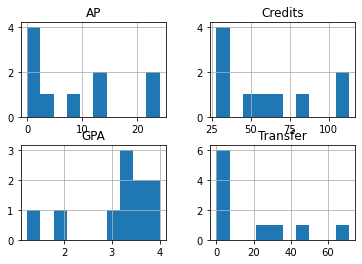

In [36]:
students.hist()
plt.show()

It is usually more useful to consider a single column at a time:

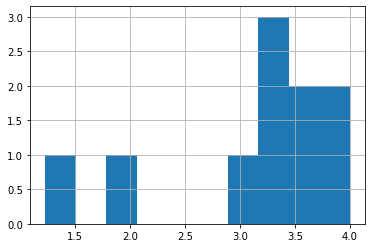

In [37]:
students['GPA'].hist()

You can set some of the parameters that work with the `hist(...)` function, such as setting the bin boundaries, colors, and so on:

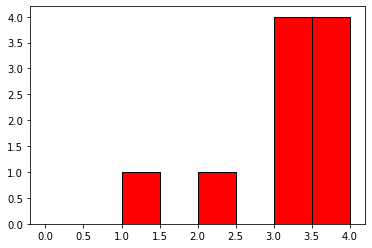

In [38]:
students['GPA'].hist(bins=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0],color='r',edgecolor='k',grid=False)

You can also use most of the standard matplotlib functions to add titles, change the size, etc.:

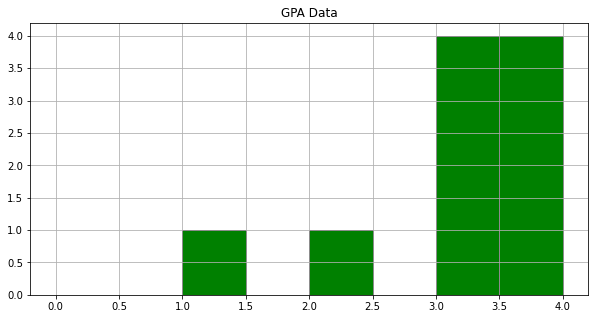

In [39]:
plt.figure(figsize=(10,5))
plt.title("GPA Data")
students['GPA'].hist(bins=[0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0],color='g',edgecolor='k')
plt.show()

## Problem Two

Download the following file of student data for 4287 students at a modern university: 

>    https://www.cs.bu.edu/fac/snyder/cs237/Data/studentdata.csv 

and do the following:

(A) Print out the mean GPA for men;

(B) Print out the mean GPA for seniors (U4);

(C) Display the 10 individuals with the largest number of credits earned, sorted in descending order by GPA;

(D) Display a histogram of the GPA of all individuals, with bins for each letter grade, i.e., 0.0, 1.0, 2.0, 2.33, 2.67, 3.0, 3.33, 3.67, and 4.0.



A.)
3.173623425104967
B.)
3.195964373464367
C.)
   Gender ClassYear  GPA  CreditsEarned  TransferCredits  APCredits
13      M        U4  4.0          102.0              0.0         32
5       M        U4  4.0          100.0              0.0         32
19      M        U3  4.0           74.0              0.0         28
9       M        U3  4.0           72.0              0.0         36
3       M        U3  4.0           68.0             14.0          0
21      F        U3  4.0           67.0              0.0         36
12      F        U4  4.0           61.0             54.0         48
10      F        U2  4.0           48.0              0.0         12
18      M        U2  4.0           37.0              0.0          0
4       M        U2  4.0           36.0              0.0         56
D.)


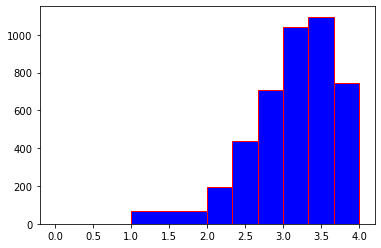

In [105]:
# Your solution here
students = pd.read_csv("https://www.cs.bu.edu/fac/snyder/cs237/Data/studentdata.csv")
st = students['GPA']
print("A.)")
print( st.mean() )

print("B.)")
vt = students[students['ClassYear'] == 'U4' ]
print(vt['GPA'].mean())


print("C.)")
zt = students.sort_values( ['GPA', 'CreditsEarned'], ascending=[False,False] )
print(zt[0:10])

print("D.)")
students['GPA'].hist(bins=[0.0,1.0,2.0,2.33,2.67,3.0,3.33,3.67,4.0],color='b',edgecolor ='r',grid=False)

## Problem Three

Download the following file of heights and weights of 25,000 individuals: 

>      https://cs-web.bu.edu/fac/snyder/cs237/Data/biometricdata.csv 

and do the following:

(A) Print out the maximum, minimum, mean, and (unbiased) standard deviation (all functions listed above) for the heights of all individuals;

(B) Print out the mean height for all individuals weighing more than 130 pounds;

(C) Print out how many individuals have a height >= 65 inches and <= 70 inches;

(D) Display a histogram of the heights of all individuals from the minimum to the maximum, where each bin represents 1 inch. Calculate the bin boundaries so that the bins are centered on the height, that is, the boundaries are
half way between each inch measurement:

>      [   ....  64.5, 65.5, 66.5, 67.5, ..... ]

The left edge of the lowest bin would be the minimum value (rounded to inches) - 0.5, and the right edge of
the highest bin would be the maximum (rounded to inches) + 0.5. The height values themselves are not rounded, just
the maximum and minimum, to get the appropriate bin edges. 

Also, provide an appropriate title, and make the histogram larger using an appropriate figsize, as shown above. 

Hint: For (D), create the bin edges using the function `np.arange(...)` (Google it!). 


In [123]:
print("A.)")
students = pd.read_csv("https://cs-web.bu.edu/fac/snyder/cs237/Data/biometricdata.csv")
st = students['Height']
print("maximum: " + str(st.max()))
print("minimum: " + str(st.min()))
print("mean: " + str(st.mean()))
print("standard Deviation: " + str(st.std()))


print("B.)")
vt = students[students['Weight'] > 130]
print("Height: ")
print(vt['Height'].mean())

print("C.)")
wt = students[(students['Height'] >= 65 ) & (students['Height'] <= 70 )]

print(wt)
print("Since there are 19846 rows that means the ANSWER is 19846")


print("D.)")

A.)
maximum: 75.1528
minimum: 60.27836
mean: 67.99311359679979
standard Deviation: 1.901678771205604
B.)
Height: 
68.91428710879264
C.)
       Unnamed: 0    Height    Weight
0               0  65.78331  112.9925
2               2  69.39874  153.0269
3               3  68.21660  142.3354
4               4  67.78781  144.2971
5               5  68.69784  123.3024
...           ...       ...       ...
24993       24993  66.19462  118.7974
24994       24994  67.21126  127.6603
24995       24995  69.50215  118.0312
24998       24998  67.52918  132.2682
24999       24999  68.87761  124.8742

[19846 rows x 3 columns]
Since there are 19846 rows that means the ANSWER is 19846
D.)


**Solution:**


 ## Problem Four (Normal Distribution)
    
The lifetime of backup battery systems made by a 
Company A has a mean of
5 years and a standard deviation of 2 years. Those made by Company B
have a mean of 4 years and a standard deviation of 18 months. 
Suppose Wayne buys one backup system from Company A, and also one from
Company B.  The one from Company A lasts 4 years and 3 months, and the one
from Company B lasts 3 years and 9 months.  

(A) Which of these backup battery systems performed relatively better, compared
with other systems from the same company? 

(B) If the backup system from Company A lasts 5 years, how long would the system from Company B last if it lasted the same amount of time relative to the performance from each company? 


Hint: Standardize the two normal distributions and compare!


**Solution**

    A.) Compare the standard z score of both companies
    
        4 years 3 months = 48 months + 3 months = 51 months
        
        A = (51-60)/24 = -0.375
        
        3 years 9 months = 36 months + 9 months = 45
        
        B = (45 - 48)/24 = -0.1667

        ANSWER: B perform better
        
    B.)
        4 years

## Problem Five (Normal Approximation to the Binomial)

This problem concerns the normal approximation to the binomial. The &quot;continuity correction&quot; (sometimes called Yates's Continuity Correction) was shown in lecture. 

In this problem we will measure the accuracy of the approximations by using
the percent error, as in previous homeworks. 

</p>
<p>(A) Suppose of all the kids that show up on Halloween night, 58% are dressed in Spiderman costumes. If 60 kids show up, what is the probability that <span>between 33 and 38</span> (inclusive) kids will be dressed in Spiderman costumes? (Use the binomial.)</p>
<p>(B) Repeat the previous question, but using the normal approximation to the binomial, without using the continuity correction, and express the accuracy of your approximation using the percentage error.</p>
<p>(C) Repeat the previous question, but now using the continuity correction, again showing the accuracy using the percentage error. </p>


**Solution:**

    A.)
        P(33 <= x <= 38) = P(x = 33) + P(x = 34) + P(x = 35) + P(x = 36) + P(x = 37) + P(x = 38)
        
        p(33) = 0.0923
        p(34) = 0.1013
        p(35) = 0.1039
        p(36) = 0.0996
        p(37) = 0.0892
        p(38) = 0.0746
       
        0.0923 + 0.1013 + 0.1039 + 0.0996 + 0.0892 + 0.0746
        = 0.5609
        
    B.)
    
        Mean = 34.8
        variance = 14.6160
        SD = 3.8231
        
        Z value for 33: 33-34.8/3.8231 = -0.47
        z value for 38: 38-34.8/3.8231 = 0.84
        
        P(-0.47<z<0.84) = P(z<0.84) - P(z<-0.47)
        
                        = 0.7995 - 0.3192
                        
                        = 0.4803
                        
                        
        Percentage error: (|4803 - 0.5609| / 0.5609)*100
        
                        = 14.40%
                        
    C.)
        Z value for 32.5, Z = (32.5-34.8)/3.8231 = -0.60
        Z value for 38.5, Z = (38.5-34.8)/3.8231 = 0.97
        
        P(-0.6<z<0.97) = P(z<0.97) - P(z<-0.60)
        
                       = 0.8340 - 0.2743
                       = 0.5597
        
        Percentage error: (|0.5597 - 0.5609| / 0.5609)*100
        
                        = 2.14%           
                       
        

## Problem Six (CLT)

<p>Suppose the heights of 3400 male students at a university are normally distributed with mean 68 inches and standard deviation 3 inches. That is, you have a random variable $X$ which uniformly at random chooses a male student and returns his height, where $E(X) = 68.0$ and $\sigma_X = 3.0$.</p>
<p>(A) Supposing sample groups of 25 men are taken from this population (with replacement)
    and the average height of the group calculated, i.e., you are investigating the random variable $\overline{X}_{25}$. What would be the expected value and standard deviation for $\overline{X}_{25}$.?</p>
<p>(b) Supposing we wanted to get more accuracy in our sampling procedure, so that we wanted the standard deviation of the result to be at most 0.25 inches. What is the smallest sample size we could use to insure this? (Formally, what is the smallest $n$ for which $\sigma_{\overline{X}_n} \le 0.25$?)</p>
<p>(c) Supposing you take 80 samples of size 25 (80 "pokes" of $\overline{X}_{25}$), in how many samples would you *expect* to find the output from $\overline{X}_{25}$ between 66.8 and 68.3 inches? The expected value may be a floating-point number. </p>





**Solution:**

    A.)
        X ~ N ( u = 68, o^2 = 3.0^2)
       
        -
        X25  = N(u, o^2/n)
             = N(68, 3.0^2 / 25)
             
        Thus,
        
        E(X) = 68
        Standard Deviation = squareroot(3.0^2 / 25)
                           = 0.60
    B.)
        𝜎𝑋⎯𝑛 ≤ 0.25
        
        = 𝜎X/√n <= 0.25
        
        = 3.0/√n <= 0.25
        
        = n => 144
        
        ANSWER: 144
        
    C.)

        N(68, 3.0^2 / 25)
        
        P(66.8 < X < 68.3) = P((66.8 - 68)/((√3.0^2)/25) < Z < P((68.3 - 68)/((√3.0^2)/25)
                
                           = P(-2 < Z 0.5)
                           
                           = P(Z < 0.5) - P(Z -2)
                           
                           = 0.69146 - [1 - 0.97725]
                           
                           = 0.66871
                           
                           
                           80 * 0.66871
                           
                           = 53.49 ~ 54
                           
                           ANSWER: 54
                           
        


## Problem Seven (Sampling Theory) 

This problem considers three different ways of answering a question about samples from an infinite population. Suppose you flip a fair coin 120 times. What is the probability that 75 or more of the flips will be heads?

(A) First solve this problem precisely using the binomial, showing your formula (you'll need to use Python -- look at the end of the previous cell above to see some useful functions). 

(B) Next, solve the problem by using the normal approximation to the binomial (using the continuity correction). 

Finally, we will solve this as a problem in sampling: let $X$ be a Bernoulli (each coin flip) and let 

$$\overline{X} = {X_1 + \cdots + X_{120})\over 120},$$ so that by the CLT, $\overline{X}\sim N(\mu,\sigma^2)$
for some mean $\mu$ and variance $\sigma^2$. 

(C) Give the mean $\mu$ and variance $\sigma^2$.

(D)  Now calculate the answer using the CLT, using the continuity correction
(where effectively the bins have width 1/120, so you should adjust the boundary by
one half the width of the bin), and give the percentage error.  

Hint: You should get the same answer for (B) and (D); they will be close to, but not the same as, the "ground truth" answer in (A). 

**Solution:**

    A.)
        X ~ B(n = 120, p = 0.5)
        
        P(x => 75) = 100 Σ x = 75 (N C X) * p^x * (1-p)^n-x
                   = 100 Σ x = 75 (120 C x) * (0.5)^x * (0.5)^n-x
                   = 0.0039
                   
                   ANSWER: 0.0039
    B.)
    
        P(X => 75) = P(X > 74.5)
                   = P(x-np/squareroot(np(1-p)) > (74.5-np)/squareroot(np(1-p))
                   = P(Z > (74.5 - 60) / squareroot(30))
                   = 1 - P(Z <= 2.6473)
                   = 1 - 0.997
                   = 0.003
        
    C.)
        Mean = P
        
        P = 0.5
        
        
        Mean = 0.5
        
        Variance = P(1 - p)/n
                 = 0.5 * 0.5 / 120
                 = 0.00208
    
    D.)
        P(X => 75/120) = P(X > 75/120)
                       = P(X - P/squareroot(p(1-p)/n) > 0.625 - p/squareroot(p(1-p)/n)
                       = p(Z > 0.625-0.5/squareroot(0.0021))
                       = 1 - P(Z <= 2.7412)
                       = 1 - 0.997
                       = 0.003

## Problem Eight 

CANCELLED!

## Problem Nine (CLT and Sampling) 

Suppose you know that when there was a vote for the major of Cambridge, MA, 54.8% of the people voted for candidate A. 

(a) Supposing samples of size 30 are taken, what would you expect to be the mean and standard deviation of the sampling distribution of proportions? Give your result in terms of percentages.

(b) Supposing we wanted to get more accuracy in our sampling procedure, so that we wanted the standard deviation of the sample distribution of proportions to be at most 5%. What is the smallest sample size we could use to insure this?

(c) Supposing you take 100 samples of size 30, in how many samples would you expect to find the proportion accurate to 1%, i.e., between 53.8% and 55.8% ? (Don't worry about using the continuity correction here.)

Hint: This is the same as the last problem, but where the population represents the outcomes of a Bernoulli
experiment with p = 0.548. In such cases, we do not need to be given the population standard deviation, because it is determined by a formula involving p;  (get out
your "cheatsheet" from the midterm!).   This is a special case called "sampling with proportions." 

**Solution:**

    A.) 
        54.8% voted for A
        
        mean = 54.8%
        
        p = 0.548
        n = 30
        
        standard of deviation = √(p(1-p)/n)
                           = √(0.548(1-0.548)/30
                           = √0.00825653
                           = 0.09086546
                           = 0.0909
    B.)
        p = 0.548
   
        standard of deviation < 5% = 0.05
        
        √(p(1-p)/n) < 0.0025
        
        0.548(1-0.548)/n < 0.0025

        n > 0.548(1-0.548) / 0.0025

        n > 99.0784 
        
        n = 100
        
        ANSWER: 100
        
    C.)
    
        Margin of error: 1%
        Size: 30
        Standard deviation: 0.0909
        
        Formula for margin of error = Z * standard of deviation
                               0.01 = Z * 0.0909
                               
                      0.01 / 0.0909 = Z
                      
                      
                      P(Z < 0.11) = 0.5438
                      P(Z < -0.11) = 0.4562
                      
                      100 * 0.4562 = 45.6
                      
                      ANSWER: 45.6 samples
        


## Problem Ten 

CANCELLED! 